In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("marketing_campaign.csv",sep = "\t")
df1 = df.copy()

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
print("Data sayisi:",len(df))
print("Column sayisi:",len(df.columns))

Data sayisi: 2240
Column sayisi: 29


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df = df.dropna()
print("Eksik veriler cikarildiktan sonra kalan data sayisi:",len(df))

Eksik veriler cikarildiktan sonra kalan data sayisi: 2216


In [9]:
print("Marital_Status kolonunun siniflari ve sayilari:\n",df["Marital_Status"].value_counts())
print("Education kolonunun siniflari ve sayilari:\n",df["Education"].value_counts())

Marital_Status kolonunun siniflari ve sayilari:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Education kolonunun siniflari ve sayilari:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [10]:
df["Education"] = df["Education"].replace({"Graduation" : "Graduate" , "PhD" : "PostGraduate" , "Master" : "PostGraduate" , "2n Cycle" : "UnderGraduate" , "Basic" : "Basic"})

In [11]:
df["Marital"] = df["Marital_Status"].replace({"Married" : "Partner" , "Together" : "Partner" , "Single" : "Alone" , "Divorced" : "Alone" , "Widow" : "Alone" , "Absurd" : "Alone" , "YOLO" : "Alone"})

In [12]:
df["Age"] = 2021 - df["Year_Birth"]

In [13]:
df["Amount_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [14]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital,Age,Amount_Spent
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Alone,64,1617
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Alone,67,27
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Partner,56,776
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Partner,37,53
4,5324,1981,PostGraduate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Partner,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,Partner,54,1341
2236,4001,1946,PostGraduate,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,Partner,75,444
2237,7270,1981,Graduate,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,Alone,40,1241
2238,8235,1956,PostGraduate,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,Partner,65,843


In [15]:
df = df.rename(columns = {"MntWines" : "Wines", "MntFruits" : "Fruits", "MntMeatProducts" : "Meat", "MntFishProducts" : "Fish", "MntSweetProducts" : "Sweet" , "MntGoldProds" : "Gold"})

In [16]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [17]:
df["FamilyMember"] = df["Children"] + df["Marital"].replace({"Alone" : 1 , "Partner" : 2})

In [18]:
df["Is_Parent"] = np.where(df["Children"] > 0,1,0)

In [19]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Amount_Spent,Children,FamilyMember,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,52.179603,607.075361,0.947202,2.592509,0.714350
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 432x288 with 0 Axes>

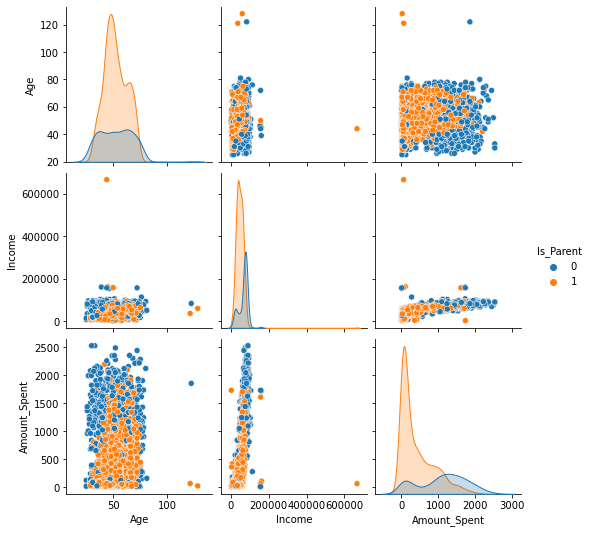

In [20]:
plot = ["Age","Income" , "Amount_Spent","Is_Parent"]
plt.figure()
sns.pairplot(df[plot],hue = "Is_Parent")

[Text(0.5, 1.0, 'Musterilerin egitim duzeyleri')]

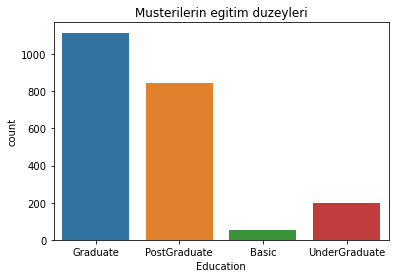

In [21]:
ax = sns.countplot(data = df, x = "Education")
ax.set(title = "Musterilerin egitim duzeyleri")
#Musterilerin cogunlugunu mezunlar olusturuyor.

[Text(0.5, 1.0, 'Musterilerin evlilik durumlari')]

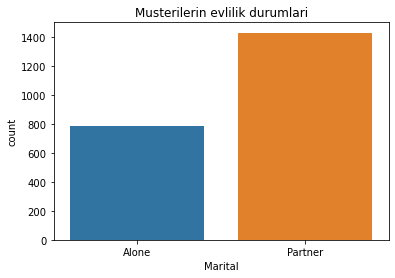

In [22]:
ax = sns.countplot(data = df, x = "Marital")
ax.set(title = "Musterilerin evlilik durumlari")
#Musterilerin daha cok bir partner ile yasadiklarini goruyoruz. Bu bilgiden urun satarken yararlinabilir.

[Text(0.5, 1.0, 'Ailedeki cocuk sayisi')]

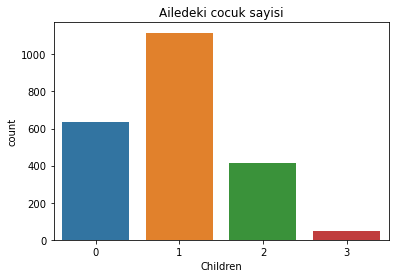

In [23]:
ax = sns.countplot(data = df , x = "Children")
ax.set(title = "Ailedeki cocuk sayisi")
#Tek cocuk sayisi digerlerinden daha yuksek. Bir ailede en fazla 3 cocuk var.

[Text(0.5, 1.0, 'Ebeveyn grafigi')]

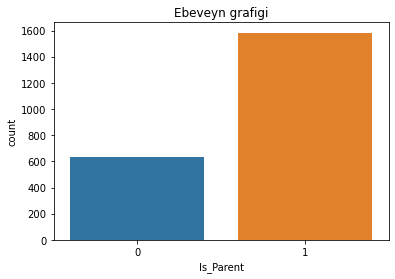

In [24]:
ax = sns.countplot(data = df , x = "Is_Parent")
ax.set(title = "Ebeveyn grafigi")
#Ebeveyn sayisi ebeveyn olmayanlarin neredeyse 3 kati.

Kabul edenlerin yuzdesi =  15.027075812274369


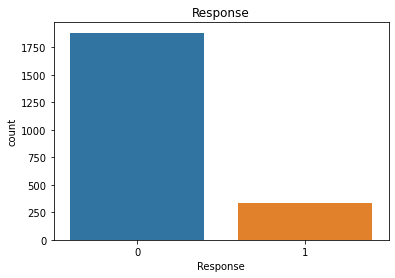

In [25]:
ax = sns.countplot(data = df, x = "Response")
ax.set(title = "Response")
print("Kabul edenlerin yuzdesi = ",len(df[df["Response"]==1])/len(df["Response"])*100)
#Musterilerin buyuk bolumu son yapilan teklifi reddetmis.

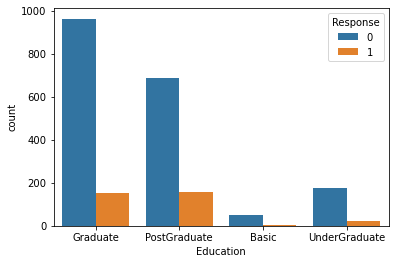

In [26]:
ax = sns.countplot(data = df, x = "Education", hue = "Response")
#PostGraduatelerin kampanyayi kabul etme oranlari digerlerinden daha yuksek.

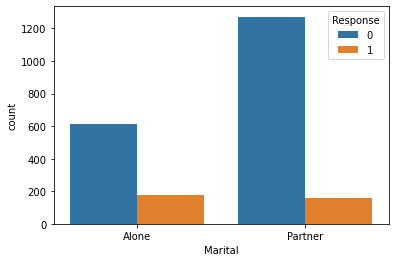

In [27]:
ax = sns.countplot(data = df, x = "Marital", hue = "Response")
#Yalniz yasayanlarin kampanyayi kabul etme oranlari birlikte yasayanlardan daha yuksek.

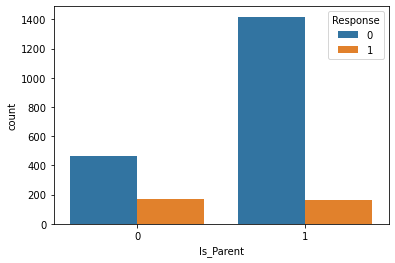

In [28]:
ax = sns.countplot(x = "Is_Parent", data = df, hue = "Response")
#Ebeveyn olmayanlarin kampanyayi kabul etme olasiligi ebeveyn olanlara gore daha yuksek.

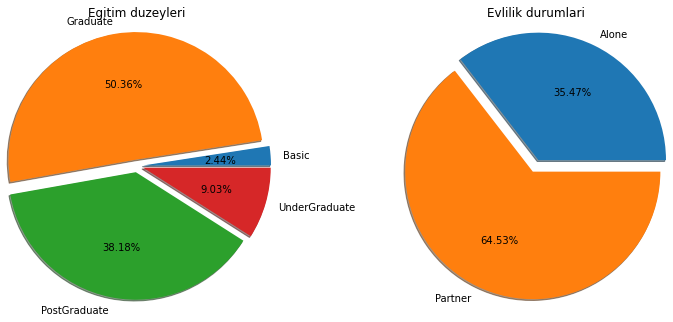

In [29]:
cat = df.groupby("Education").count()["Age"]
label = df.groupby("Education").count()["Age"].index
fig, ax = plt.subplots(1,2, figsize = (10, 12))
ax[0].pie(cat,labels = label, autopct='%.2f%%', shadow = True,radius = 2, explode = [0.1,0.1,0.1,0.1])
ax[0].set_title("Egitim duzeyleri", pad = 70)

cat = df.groupby("Marital").count()["Age"]
label = df.groupby("Marital").count()["Age"].index
ax[1].pie(cat, labels = label, autopct = '%.2f%%', shadow = True,radius = 2, explode = [0.1, 0.1])
ax[1].set_title("Evlilik durumlari",pad = 70)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()
#Musterilerin yaklasik yuzde 98i en azından lisans seviyesinde.
#Musterilerin yaklasik yuzde 35i tek yasiyor.

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital,Age,Amount_Spent,Children,FamilyMember,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Alone,64,1617,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Alone,67,27,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Partner,56,776,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Partner,37,53,1,3,1
4,5324,1981,PostGraduate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Partner,40,422,1,3,1


[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Musteri yaslari')]

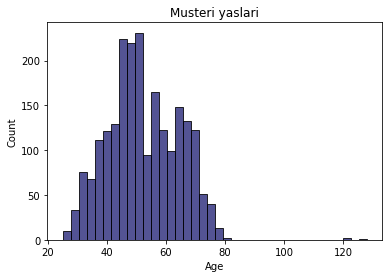

In [31]:
ax = sns.histplot(data = df,x = "Age",color = "midnightblue")
ax.set(xlabel = "Age", title = "Musteri yaslari")
#Musterilerin yaslari 40-60 arasinda yogun.

In [32]:
#ayrık verileri siliyoruz
df = df[(df["Age"]< 110)] 
df = df[(df["Income"]<400000)] 

In [33]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Amount_Spent,Children,FamilyMember,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,3.0,11.0,0.150542,52.086347,607.268083,0.947559,2.593128,0.714286
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.0,0.0,0.357683,11.701599,602.513364,0.749466,0.906236,0.451856
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,397.000000,1.000000,3.000000,1.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,81.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 432x288 with 0 Axes>

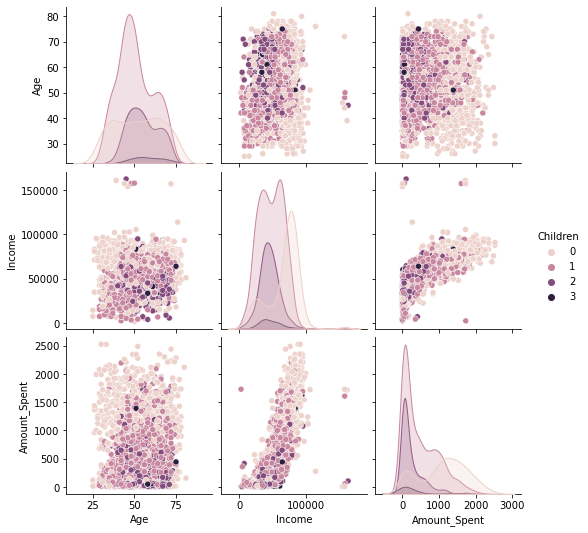

In [34]:
plot = ["Age","Income" , "Amount_Spent","Children"]
plt.figure()
sns.pairplot(df[plot],hue = "Children")


In [35]:
df = df.drop(["Z_Revenue","Z_CostContact","Marital_Status"],axis=1)
#Bilgi saglamayan kategoriler oldugu icin siliyoruz.

<AxesSubplot:>

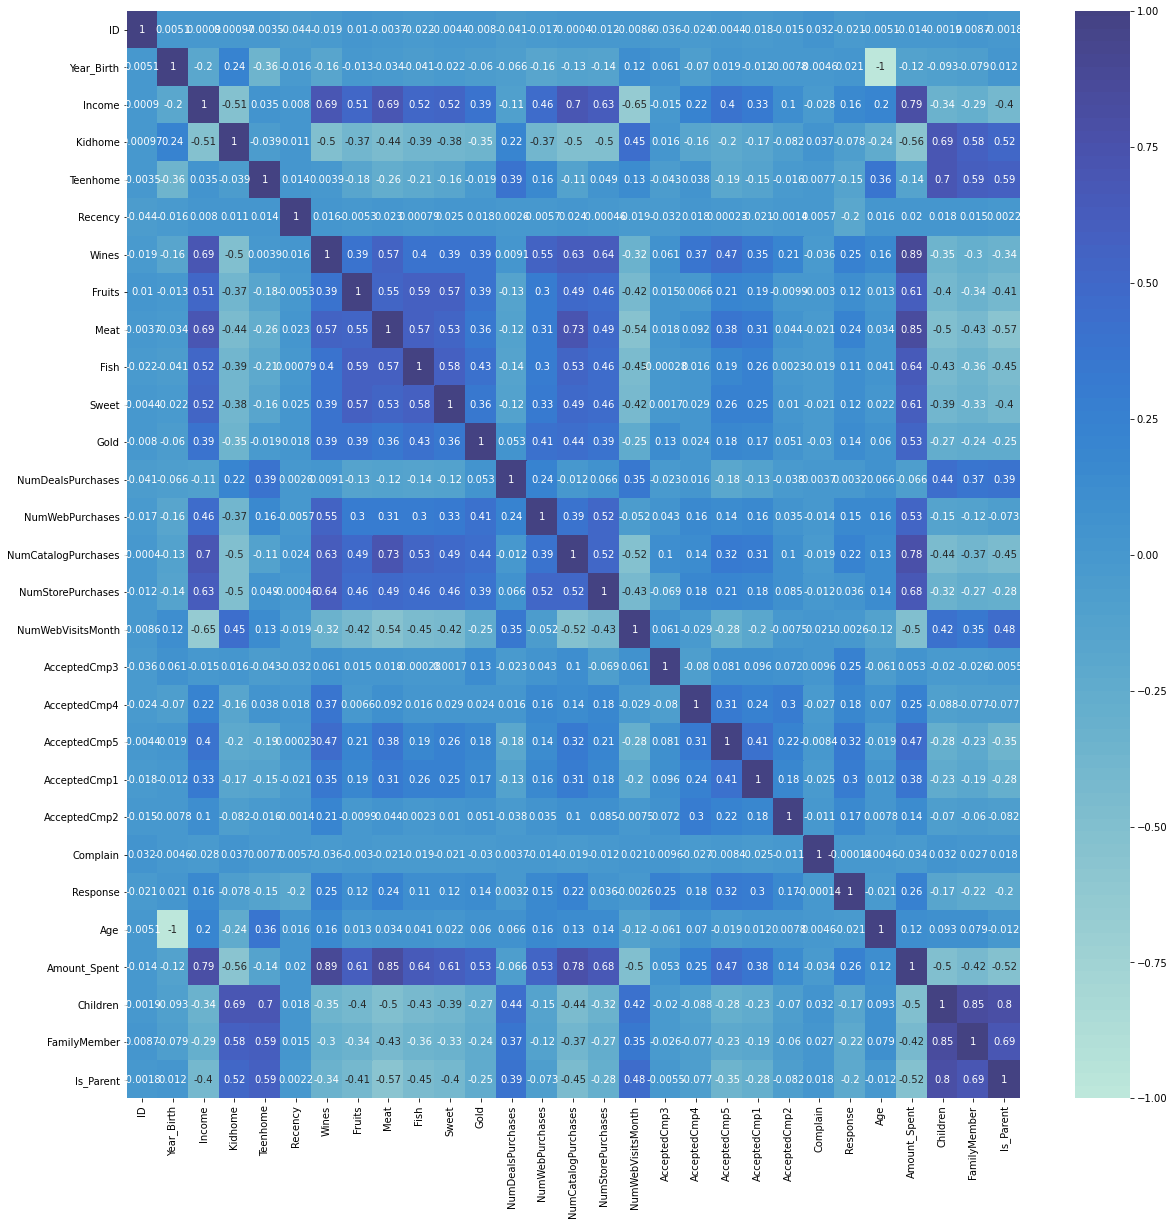

In [36]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=2)

In [37]:
s = (df.dtypes == 'object')
cat = list(s[s].index)
print("Kategorik degiskenler : ",cat)

Kategorik degiskenler :  ['Education', 'Dt_Customer', 'Marital']


In [38]:
LE=LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [39]:
y = df["Response"]
X = df.drop(["Response"],axis = 1)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2212.0,5585.160940,3247.523735,0.0,2814.75,5454.5,8418.50,11191.0
Year_Birth,2212.0,1968.913653,11.701599,1940.0,1959.00,1970.0,1977.00,1996.0
Education,2212.0,1.536618,0.690451,0.0,1.00,1.0,2.00,3.0
Income,2212.0,51958.810579,21527.278844,1730.0,35233.50,51371.0,68487.00,162397.0
Kidhome,2212.0,0.441682,0.536955,0.0,0.00,0.0,1.00,2.0
Teenhome,2212.0,0.505877,0.544253,0.0,0.00,0.0,1.00,2.0
Dt_Customer,2212.0,327.979204,189.775638,0.0,164.00,326.0,485.00,661.0
Recency,2212.0,49.019439,28.943121,0.0,24.00,49.0,74.00,99.0
Wines,2212.0,305.287523,337.322940,0.0,24.00,175.5,505.00,1493.0
Fruits,2212.0,26.329566,39.744052,0.0,2.00,8.0,33.00,199.0


In [41]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

         Current function value: 0.276003
         Iterations: 35


C:\Users\Melih\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 2212
Model:                          Logit   Df Residuals:                     2184
Method:                           MLE   Df Model:                           27
Date:                Fri, 24 Dec 2021   Pseudo R-squ.:                  0.3485
Time:                        11:59:27   Log-Likelihood:                -610.52
converged:                      False   LL-Null:                       -937.11
Covariance Type:            nonrobust   LLR p-value:                2.350e-120
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -1.337e-05   2.31e-05     -0.579      0.562   -5.86e-05    3.19e-05
Year_Birth             -0.0010   2967.104  -3.41e-07      1.000   -5815.418    5815.416
Education               0.2199      0.111      1.978      0.048       0.002       0.438
Income              -2.459e-06   7.85e-06     -0.313      0.754   -1.79e-05    1.29e-05
Kidhome                 0.9857   3.28e+06   3.01e-07      1.000   -6.43e+06    6.43e+06
Teenhome               -0.1352   3.28e+06  -4.13e-08      1.000   -6.43e+06    6.43e+06
Dt_Customer             0.0001      0.000      0.270      0.787      -0.001       0.001
Recency                -0.0283      0.003     -9.899      0.000      -0.034      -0.023
Wines                  -0.0010   1.46e+04  -6.53e-08      1.000   -2.87e+04    2.87e+04
Fruits                  0.0007   1.46e+04   4.82e-08      1.000   -2.87e+04    2.87e+04
Meat                    0.0007   1.46e+04   4.53e-08      1.000   -2.87e+04    2.87e+04
Fish                   -0.0026   1.46e+04  -1.76e-07      1.000   -2.87e+04    2.87e+04
Sweet                  -0.0018   1.46e+04  -1.24e-07      1.000   -2.87e+04    2.87e+04
Gold                    0.0015   1.46e+04   1.04e-07      1.000   -2.87e+04    2.87e+04
NumDealsPurchases       0.1087      0.046      2.377      0.017       0.019       0.198
NumWebPurchases         0.1095      0.033      3.307      0.001       0.045       0.174
NumCatalogPurchases     0.0683      0.041      1.686      0.092      -0.011       0.148
NumStorePurchases      -0.1456      0.035     -4.192      0.000      -0.214      -0.078
NumWebVisitsMonth       0.2100      0.048      4.358      0.000       0.116       0.304
AcceptedCmp3            1.7528      0.221      7.921      0.000       1.319       2.187
AcceptedCmp4            1.0213      0.278      3.671      0.000       0.476       1.567
AcceptedCmp5            1.5087      0.280      5.380      0.000       0.959       2.058
AcceptedCmp1            1.0841      0.266      4.078      0.000       0.563       1.605
AcceptedCmp2            1.3022      0.551      2.362      0.018       0.222       2.383
Complain                0.0310      0.943      0.033      0.974      -1.818       1.880
Marital                -0.6445      6e+06  -1.07e-07      1.000   -1.18e+07    1.18e+07
Age                     0.0059   2967.104      2e-06      1.000   -5815.411    5815.423
Amount_Spent            0.0014   1.46e+04   9.73e-08      1.000   -2.87e+04    2.87e+04
Children                0.1095   6.24e+06   1.75e-08      1.000   -1.22e+07    1.22e+07
FamilyMember           -0.5350      6e+06  -8.92e-08      1.000   -1.18e+07    1.18e+07
Is_Parent              -0.7223      0.321     -2.249      0.025      -1.352      -0.093
=======================================================================================
"""

In [42]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital,Age,Amount_Spent,Children,FamilyMember,Is_Parent
0,5524,1957,1,58138.0,0,0,80,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,64,1617,0,1,0
1,2174,1954,1,46344.0,1,1,157,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,67,27,2,3,1
2,4141,1965,1,71613.0,0,0,444,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1,56,776,0,2,0
3,6182,1984,1,26646.0,1,0,199,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,37,53,1,3,1
4,5324,1981,2,58293.0,1,0,390,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,40,422,1,3,1


In [43]:
#Response - AcceptedCmp5 binary veriler.

In [44]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [45]:
loj_model.intercept_
#sabit deger

array([-7.26980739e-07])

In [46]:
loj_model.coef_
#katsayi deger

array([[-2.61417859e-05, -7.42584863e-04,  1.31261373e-01,
         9.78459903e-06,  2.20459425e-01, -2.73445633e-01,
        -2.68102929e-05, -2.57024283e-02,  5.08838483e-04,
        -2.92876931e-04,  7.70755602e-04, -2.45581444e-03,
        -8.32862171e-05,  2.40247926e-03,  8.02864067e-02,
         6.10425245e-02,  8.20870526e-02, -2.27566987e-01,
         2.27368362e-01,  4.20394738e-01,  2.26119253e-01,
         3.64768426e-01,  3.32530748e-01,  1.15681035e-01,
         8.69919726e-03, -3.74483085e-01, -7.26643214e-04,
         8.50095756e-04, -5.29862083e-02, -4.27470020e-01,
        -1.79763409e-01]])

In [47]:
y_pred = loj_model.predict(X)
confusion_matrix(y,y_pred)

array([[1840,   39],
       [ 224,  109]], dtype=int64)

In [48]:
accuracy_score(y,y_pred)

0.8811030741410488

In [49]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1879
           1       0.74      0.33      0.45       333

    accuracy                           0.88      2212
   macro avg       0.81      0.65      0.69      2212
weighted avg       0.87      0.88      0.86      2212



In [50]:
recall_score(y, y_pred)

0.32732732732732733

In [51]:
accuracy_score(y,y_pred)

0.8811030741410488

In [52]:
loj_model.predict(X)[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

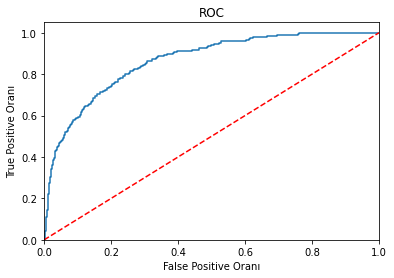

In [53]:
logit_roc_auc = roc_auc_score(y , loj_model.predict(X))

fpr,tpr, thresholds = metrics.roc_curve(y , loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1] , [0,1] , 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.25, random_state = 42)


In [55]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [56]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8698010849909584

In [57]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8482142857142858

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30, random_state = 42)


In [59]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [60]:
y_pred = knn_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.8177710843373494

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       553
           1       0.38      0.14      0.20       111

    accuracy                           0.82       664
   macro avg       0.61      0.54      0.55       664
weighted avg       0.77      0.82      0.78       664



In [63]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [64]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params,cv = 10)
knn_cv.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [65]:
print("En iyi skor : " + str(knn_cv.best_score_))
print("En iyi parametreler : " + str(knn_cv.best_params_))

En iyi skor : 0.8585295349811479
En iyi parametreler : {'n_neighbors': 25}


In [66]:
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30, random_state = 42)

In [67]:
xgb_model = XGBClassifier(eval_metric='mlogloss').fit(X_train, y_train)

C:\Users\Melih\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [68]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test , y_pred)

0.8704819277108434

In [70]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


[[524  29]
 [ 64  47]]


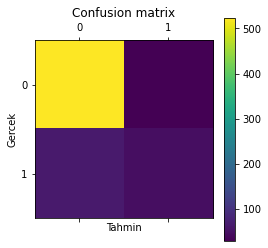

Train MCC: 1.0
Test MCC:  0.4347921164066776
Test ACC:  0.8599397590361446
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       553
           1       0.62      0.42      0.50       111

    accuracy                           0.86       664
   macro avg       0.75      0.69      0.71       664
weighted avg       0.85      0.86      0.85       664



In [86]:
BT = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200)  
BT.fit(X_train, y_train)
predictions = BT.predict(X_test)
#Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.xlabel("Tahmin")
plt.ylabel("Gercek")
plt.colorbar()
plt.show()

# Classification Report
BT_MCC = matthews_corrcoef(y_test, predictions)

print('Train MCC: '+ str(matthews_corrcoef(BT.predict(X_train), y_train)))
print('Test MCC: ', str(BT_MCC))
print('Test ACC: ', accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))

# Sonuc

Modelin genel test dogrulugu 0.86'dır. Model negatif örneklerde iyi sonuc verirken pozitif orneklerde iyi sonuc vermiyor. Test MCC'si 0.43'tür. Bu da modelin test setinde pozitif örnekler bulmada iyi olmayabileceğini gösterir. Bu sonuç veri setinde kullandığımız tahmin edicilerin 'Response'u çok iyi tahmin edemeyebileceğini gösterebilir.